<a href="https://colab.research.google.com/github/JCaballerot/Deep_learning_program/blob/main/Topicos_avanzados/concatenacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><font size="5">FASHION MNIST</font></h1>


<center>
  <img src="https://www.researchgate.net/publication/346405197/figure/fig3/AS:962581560848384@1606508736352/Examples-of-Fashion-MNIST-dataset.ppm" width="800" height="300">
</center>


Este laboratorio esta construido para construir y entrenar modelos de redes neuronales convolucionales (CNN) usando el dataset Fashion MNIST, un conjunto de datos popular para el aprendizaje automático que consiste en imágenes de artículos de moda. A continuación, se detallan los pasos y componentes clave del script:



### 1. Carga y Preprocesamiento de Datos


Primero, importamos el dataset Fashion MNIST utilizando la biblioteca Keras. Este dataset incluye 60,000 imágenes para entrenamiento y 10,000 imágenes para pruebas, cada una de 28x28 píxeles, en escala de grises.

In [3]:
%%capture
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

# Cargar el dataset Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Redimensionar las imágenes y normalizar
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convertir los labels a one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### 2. Construcción de Modelos de Redes Neuronales Convolucionales (CNN)



**Modelo sin Concatenación**

Primero, construimos un modelo de CNN básico usando la clase Sequential de Keras, que apila capas en una secuencia lineal. Este modelo incluye tres capas convolucionales Conv2D para la extracción de características, seguidas por capas de MaxPooling2D para reducir la dimensionalidad, y finaliza con capas Dense para la clasificación.

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1

l1_reg = 0.01

model_sin_concat = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=l1(l1_reg)),
    BatchNormalization(),
    Dropout(0.25),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l1(l1_reg)),
    Dropout(0.5),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l1(l1_reg)),
    Dropout(0.5),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer = l1(l1_reg)),
    Dropout(0.25),
    Dense(10, activation='softmax', kernel_regularizer = l1(l1_reg))
])



In [9]:

model_sin_concat.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model_sin_concat.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

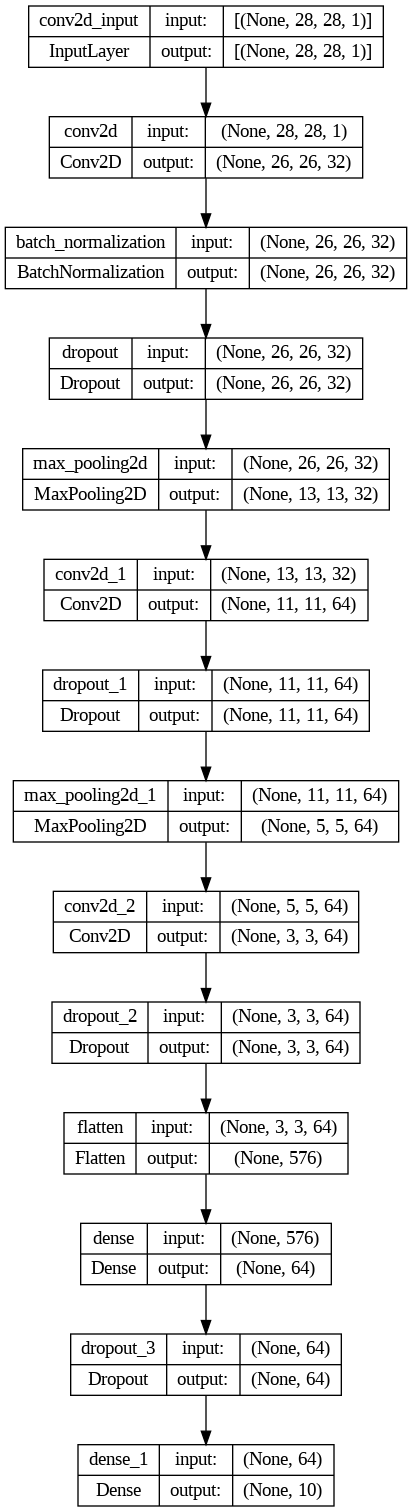

In [11]:
from tensorflow import keras
keras.utils.plot_model(model_sin_concat, show_shapes=True)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Modelo sin concatenación
model_sin_concat = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_sin_concat.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_sin_concat.summary()


**Modelo con Concatenación**

Luego, construimos un modelo más complejo que utiliza una arquitectura de red con ramas. Este modelo toma la misma entrada y aplica dos series de operaciones en paralelo (denominadas ramas), para luego concatenar sus salidas y continuar con capas densas hasta la clasificación final.

In [18]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, concatenate
from keras.layers import BatchNormalization, Activation


# Entrada
input_img = Input(shape=(28, 28, 1))

# Rama 1
x1 = Conv2D(32, (3, 3), padding='same', kernel_regularizer = l1(l1_reg))(input_img)
x1 = Dropout(0.25)(x1)
x1 = MaxPooling2D((2, 2))(x1)
x1 = Activation('relu')(x1)
x1 = BatchNormalization()(x1)
x1 = Conv2D(64, (3, 3), padding='same', kernel_regularizer = l1(l1_reg))(x1)
x1 = Dropout(0.5)(x1)
x1 = Activation('relu')(x1)
x1 = MaxPooling2D((2, 2))(x1)

# Rama 2
x2 = Conv2D(64, (3, 3), padding='same', kernel_regularizer = l1(l1_reg))(input_img)
x2 = Dropout(0.5)(x2)
x2 = MaxPooling2D((2, 2))(x2)
x2 = Activation('relu')(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(32, (3, 3), padding='same', kernel_regularizer = l1(l1_reg))(x2)
x2 = Dropout(0.25)(x2)
x2 = Activation('relu')(x2)
x2 = MaxPooling2D((2, 2))(x2)

# Concatenación
concatenated = concatenate([x1, x2])

# Reducción y salida
x = Flatten()(concatenated)
x = Dense(64, activation='relu', kernel_regularizer = l1(l1_reg))(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu', kernel_regularizer = l1(l1_reg))(x)
x = Dropout(0.25)(x)
output = Dense(10, activation='softmax')(x)

# Modelo con concatenación
model_con_concat = Model(inputs=input_img, outputs=output)

model_con_concat.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_con_concat.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_23 (Conv2D)          (None, 28, 28, 32)           320       ['input_6[0][0]']             
                                                                                                  
 conv2d_25 (Conv2D)          (None, 28, 28, 64)           640       ['input_6[0][0]']             
                                                                                                  
 dropout_21 (Dropout)        (None, 28, 28, 32)           0         ['conv2d_23[0][0]']           
                                                                                            

### 3. Entrenamiento y Evaluación

Entrenamiento y Evaluación
Ambos modelos se entrenan usando imágenes de entrenamiento con sus respectivos labels, especificando el número de epochs y el tamaño del batch. También se separa un 20% de los datos de entrenamiento para validar el modelo durante el entrenamiento.

Después del entrenamiento, evaluamos cada modelo en el conjunto de prueba para comparar su desempeño, observando las métricas de pérdida y precisión.

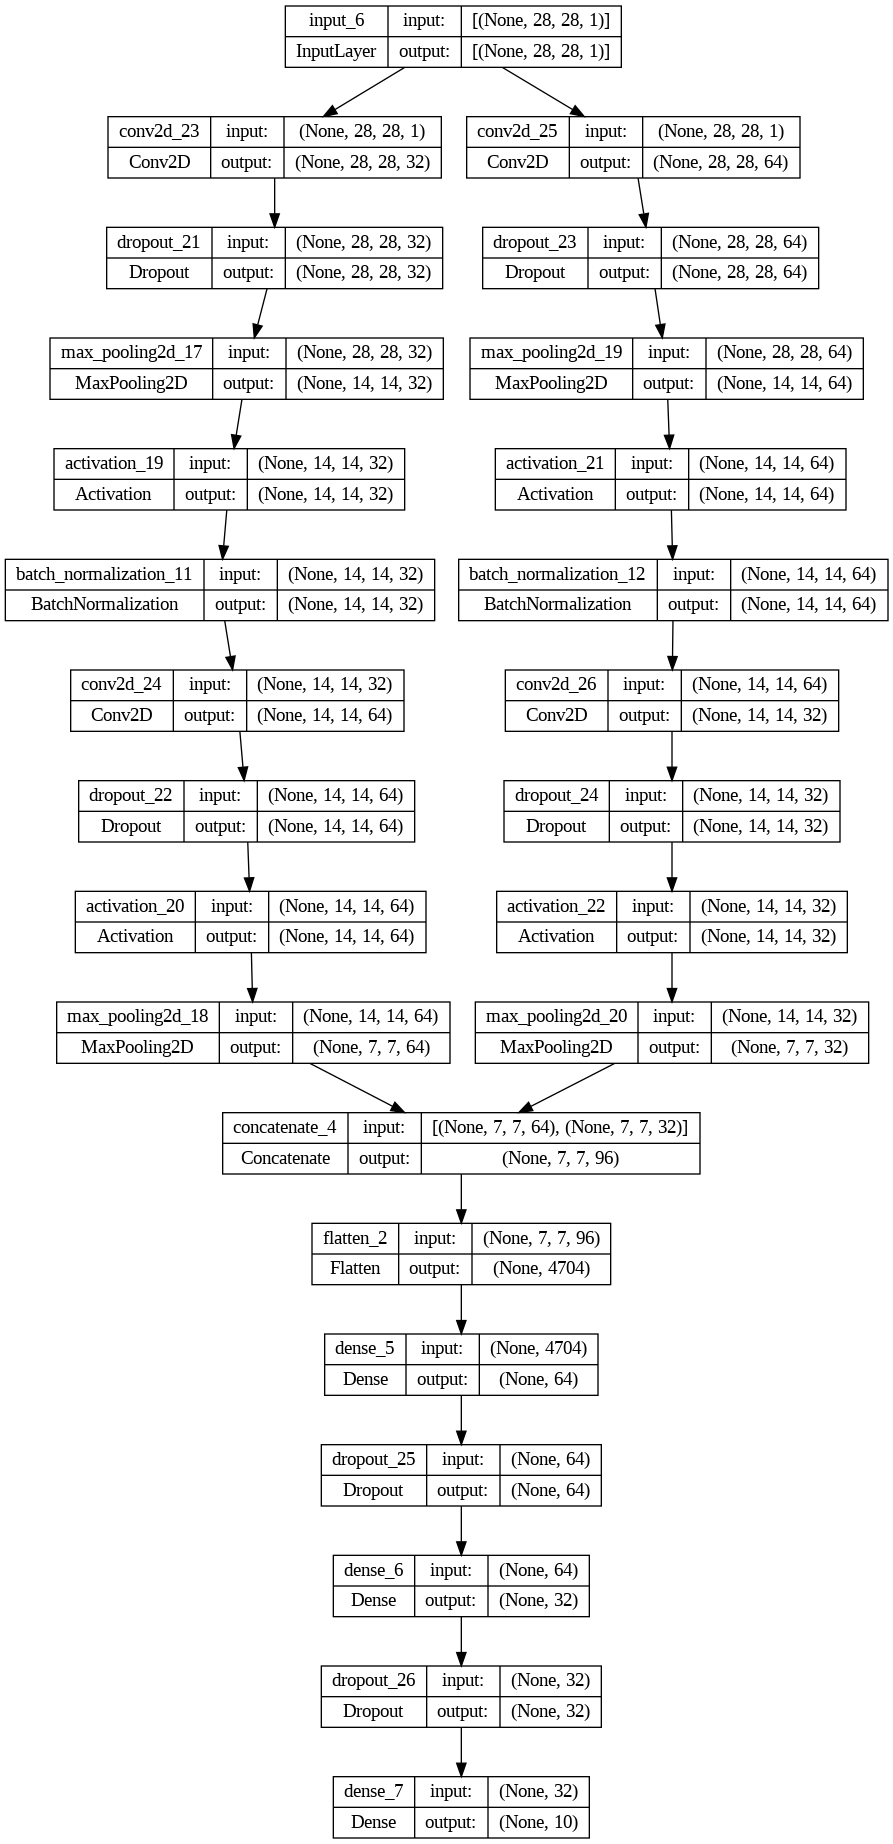

In [19]:
keras.utils.plot_model(model_con_concat, show_shapes=True)


In [20]:
# Entrenamiento del modelo sin concatenación
history_sin_concat = model_sin_concat.fit(train_images, train_labels,
                                          epochs=10,
                                          batch_size=64,
                                          validation_split=0.2)

# Entrenamiento del modelo con concatenación
history_con_concat = model_con_concat.fit(train_images, train_labels,
                                          epochs=10,
                                          batch_size=64,
                                          validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 72s 94ms/step - loss: 4.8600 - accuracy: 0.5993 - val_loss: 1.9650 - val_accuracy: 0.7264
Epoch 2/10
750/750 [==============================] - 65s 87ms/step - loss: 1.7747 - accuracy: 0.6466 - val_loss: 1.7664 - val_accuracy: 0.7255
Epoch 3/10
750/750 [==============================] - 68s 91ms/step - loss: 1.6672 - accuracy: 0.6546 - val_loss: 1.7227 - val_accuracy: 0.6984
Epoch 4/10
750/750 [==============================] - 68s 91ms/step - loss: 1.6215 - accuracy: 0.6573 - val_loss: 1.6928 - val_accuracy: 0.6967
Epoch 5/10
750/750 [==============================] - 71s 94ms/step - loss: 1.5898 - accuracy: 0.6609 - val_loss: 1.6053 - val_accuracy: 0.7268
Epoch 6/10
750/750 [==============================] - 67s 90ms/step - loss: 1.5634 - accuracy: 0.6632 - val_loss: 1.5580 - val_accuracy: 0.7390
Epoch 7/10
750/750 [==============================] - 67s 89ms/step - loss: 1.5533 - accuracy: 0.6603 - val_loss: 1.5704 - val_accuracy:

In [21]:
# Evaluación del modelo sin concatenación en el conjunto de prueba
test_loss_sin_concat, test_acc_sin_concat = model_sin_concat.evaluate(test_images, test_labels)

# Evaluación del modelo con concatenación en el conjunto de prueba
test_loss_con_concat, test_acc_con_concat = model_con_concat.evaluate(test_images, test_labels)

print("Modelo sin concatenación - Pérdida: {:.4f}, Precisión: {:.4f}".format(test_loss_sin_concat, test_acc_sin_concat))
print("Modelo con concatenación - Pérdida: {:.4f}, Precisión: {:.4f}".format(test_loss_con_concat, test_acc_con_concat))


313/313 [==============================] - 6s 20ms/step - loss: 1.5778 - accuracy: 0.7520
Modelo sin concatenación - Pérdida: 1.4961, Precisión: 0.7414
Modelo con concatenación - Pérdida: 1.5778, Precisión: 0.7520


La concatenación en modelos de redes neuronales, como se muestra, representa una técnica poderosa para mejorar la capacidad del modelo de aprender y combinar características a diferentes niveles de abstracción. Al fusionar las salidas de múltiples ramas de convolución y agrupación, este enfoque permite al modelo capturar una variedad más rica de patrones y detalles en las imágenes, lo que puede conducir a un rendimiento superior en tareas de clasificación.


---
## Gracias por completar este laboratorio!